In [19]:
import numpy as np # linear algebra
import pandas as pd # pandas for dataframe based data processing and CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import math
import gc
import ipaddress
from urllib.parse import urlparse
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from data_science_utils import dataframe as df_utils
from data_science_utils import models as model_utils
from data_science_utils import plots as plot_utils
from data_science_utils.dataframe import column as column_utils

from IPython.display import display, HTML


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report


sns.set_style('whitegrid')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.set_printoptions(threshold=np.nan)




plt.rcParams["figure.figsize"] = (24,4)

pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')



Replaced all `"` in file

In [7]:
df = pd.read_csv("Bank full.csv",delimiter=';')

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Decision Tree Analysis

In [12]:
numeric_features = ["age","balance","day","duration","campaign","pdays","previous"]
target = "y"

In [11]:
df.loc[df["y"]=="no","y"] = False
df.loc[df["y"]=="yes","y"] = True
df["y"] = df["y"].astype(bool)

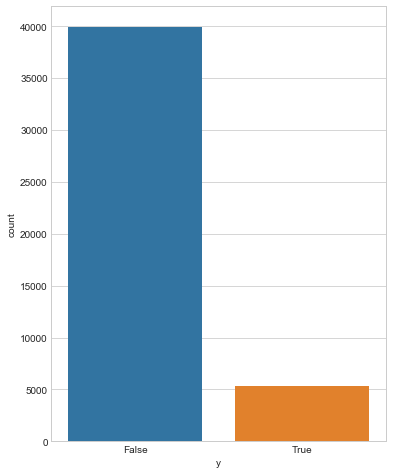

In [26]:
plt.rcParams["figure.figsize"] = (6,8)
plt.xlabel("Campaign Success")
sns.countplot(x="y", data=df);

In [13]:
from sklearn.tree import DecisionTreeClassifier
xgc = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_split=16,min_samples_leaf=8)
xgc.fit(df[numeric_features],df[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=16,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

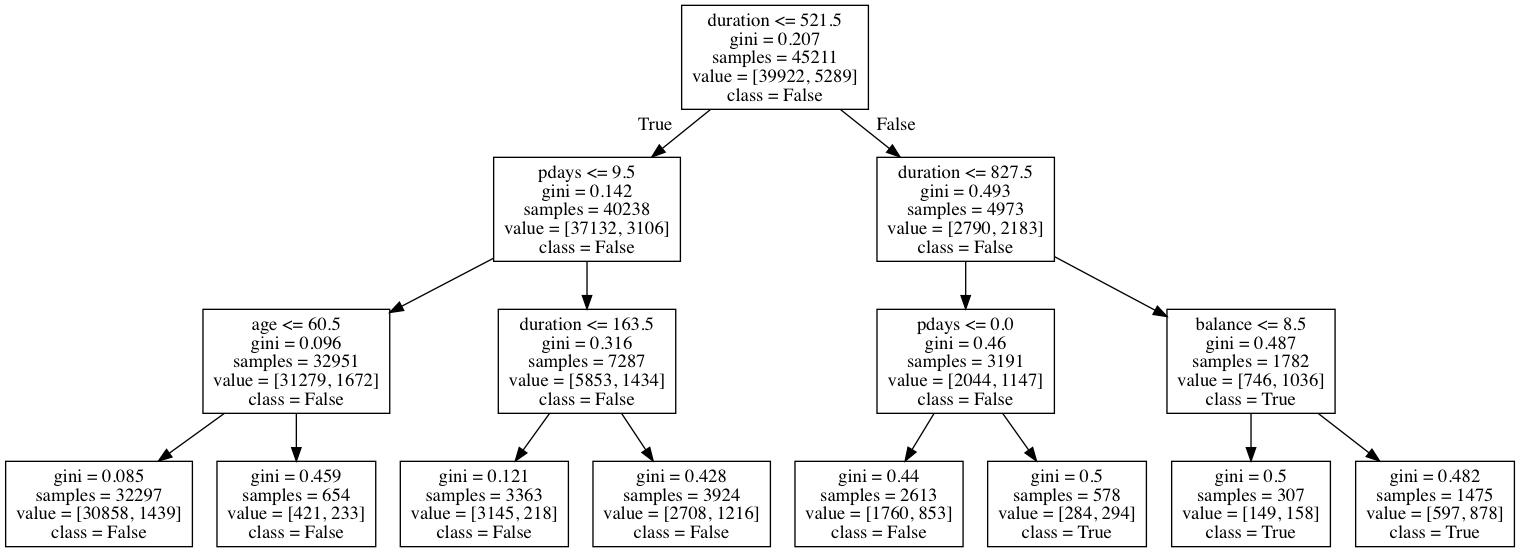

True

In [28]:

from IPython.display import Image  
from sklearn import tree
import pydotplus


# Create DOT data

dot_data = tree.export_graphviz(xgc, out_file=None, 
                                feature_names=numeric_features,  
                                class_names=["False","True"])


# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png("decision_tree.png")



img = graph.create_png()



# Show graph
Image(img)
graph.write_pdf("tree.pdf")

In [15]:
df[["age","balance","day","duration","campaign","pdays","previous"]+["y"]].sample(10)

,age,balance,day,duration,campaign,pdays,previous,y
685,54,510,6,196,2,-1,0,False
18263,59,0,31,52,8,-1,0,False
37444,34,3,13,369,2,-1,0,False
37829,33,249,14,7,7,287,4,False
13046,36,-257,8,24,26,-1,0,False
12830,31,475,7,226,1,-1,0,False
41219,31,1251,21,282,1,197,5,False
17169,47,0,28,327,3,-1,0,False
12756,27,266,7,232,1,-1,0,False
26830,41,650,20,2420,3,-1,0,True


### Grouping and slicing dicing